In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, classification_report
import matplotlib.pylab as plt
import datetime as dt

import time

from keras.models import Sequential#, Graph
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D
from keras.callbacks import Callback


Using TensorFlow backend.


In [2]:
from preprocessing import load_snp_close, split_into_chunks, create_Xt_Yt

In [3]:
class TrainingHistory(Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []
        self.predictions = []
        self.predictions = []
        self.i = 0
        self.save_every = 5000
        
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))
        self.i += 1
        
        if self.i % self.save_every == 0:
            pred = model.predict(X_train)
            self.predictions.append(pred)

In [4]:
TRAIN_SIZE = 30
TARGET_TIME = 1
LAG_SIZE = 1
EMB_SIZE = 1

[INFO] Loading SNP Dataset


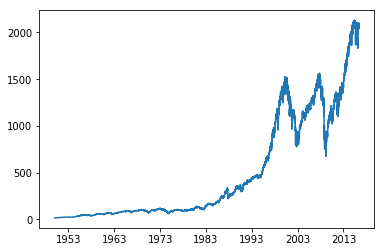

In [5]:
print("[INFO] Loading SNP Dataset")
timeseries, dates = load_snp_close()
dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in dates]
plt.plot(dates, timeseries)

In [6]:
TRAIN_SIZE = 20
TARGET_TIME = 1
LAG_SIZE = 1
EMB_SIZE = 1

In [7]:
X, Y = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE,
    binary=False, scale=True)
X, Y = np.array(X), np.array(Y)
X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y, percentage=0.9)

In [8]:
Xp, Yp = split_into_chunks(timeseries, TRAIN_SIZE, TARGET_TIME, LAG_SIZE,
    binary=False, scale=True)
Xp, Yp = np.array(Xp), np.array(Yp)
X_trainp, X_testp, Y_trainp, Y_testp = create_Xt_Yt(Xp, Yp, percentage=0.9)

In [9]:
print("[INFO] Building Model")
model = Sequential()
model.add(Dense(500, input_shape=(TRAIN_SIZE,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(250))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')


[INFO] Building Model


In [11]:
model.fit(X_train, Y_train, epochs=5, batch_size=128, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

Train on 0 samples, validate on 0 samples
Epoch 1/5


AttributeError: 'ProgbarLogger' object has no attribute 'log_values'